In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sma




In [2]:
df = pd.read_excel('dataset.xlsx', sheet_name='quaterly')
df.shape

(86, 6)

In [3]:
df.head()

,time,unemployment rate,gdp growth(%),inflation (%),job vacancies(in 1000s),POPULATION (in 1000s)
0,2001 Q2,5.0,0.4,1.8,568,59113
1,2001 Q3,5.1,0.5,1.8,554,59176
2,2001 Q4,5.2,0.2,1.4,511,59239
3,2002 Q1,5.2,0.3,1.7,522,59303
4,2002 Q2,5.2,0.5,1.3,518,59366


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      86 non-null     object 
 1   unemployment rate         86 non-null     float64
 2   gdp growth(%)             86 non-null     float64
 3   inflation (%)             86 non-null     float64
 4   job vacancies(in 1000s)   86 non-null     int64  
 5   POPULATION (in 1000s)     86 non-null     int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 4.2+ KB


In [5]:
df.describe()

,unemployment rate,gdp growth(%),inflation (%),job vacancies(in 1000s),POPULATION (in 1000s)
count,86.000000,86.000000,86.000000,86.000000,86.000000
mean,5.574419,0.388372,2.208140,585.709302,63470.651163
std,1.394880,3.062964,1.352141,165.792845,2740.970171
min,3.600000,-21.000000,0.300000,298.000000,59113.000000
25%,4.700000,0.200000,1.400000,490.750000,60980.750000
50%,5.200000,0.500000,2.050000,546.000000,63547.500000
75%,6.375000,0.775000,2.500000,670.000000,66015.500000
max,8.400000,16.600000,8.700000,1140.000000,67658.000000


In [6]:
df['quarter'] = df['time'].str.split(' ').str[1]
df['time'] = df['time'].str.split(' ').str[0]


In [7]:
df

,time,unemployment rate,gdp growth(%),inflation (%),job vacancies(in 1000s),POPULATION (in 1000s),quarter
0,2001,5.0,0.4,1.8,568,59113,Q2
1,2001,5.1,0.5,1.8,554,59176,Q3
2,2001,5.2,0.2,1.4,511,59239,Q4
3,2002,5.2,0.3,1.7,522,59303,Q1
4,2002,5.2,0.5,1.3,518,59366,Q2
...,...,...,...,...,...,...,...
81,2021,4.3,1.7,2.7,985,67412,Q3
82,2021,4.0,1.5,4.4,1086,67473,Q4
83,2022,3.7,0.6,5.5,1136,67535,Q1
84,2022,3.8,0.1,7.9,1140,67596,Q2


<AxesSubplot:xlabel='time'>

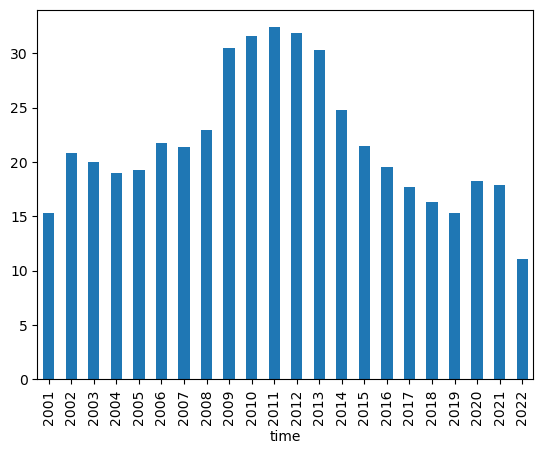

In [8]:
df.groupby(['time'])['unemployment rate'].sum().plot(kind='bar')

In [9]:
df.columns

Index(['time', 'unemployment rate', 'gdp growth(%)', 'inflation (%)',
       'job vacancies(in 1000s) ', 'POPULATION (in 1000s)', 'quarter'],
      dtype='object')

<AxesSubplot:xlabel='time'>

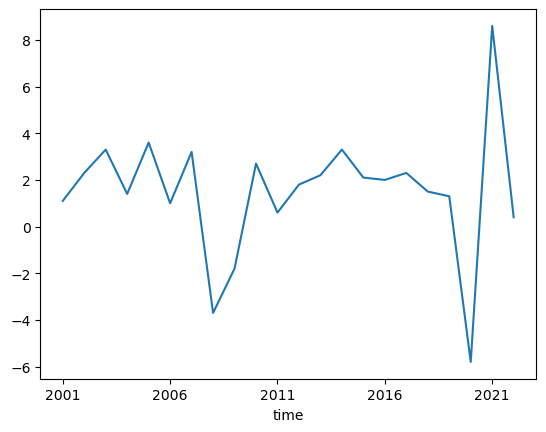

In [10]:
df.groupby(['time'])['gdp growth(%)'].sum().plot(kind='line')

<AxesSubplot:xlabel='time'>

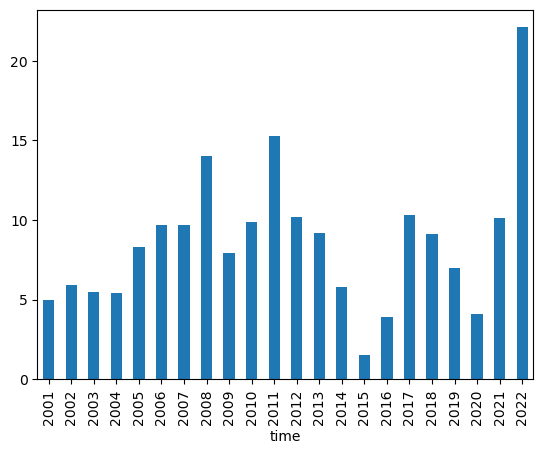

In [11]:
df.groupby(['time'])['inflation (%)'].sum().plot(kind='bar')

<AxesSubplot:xlabel='time'>

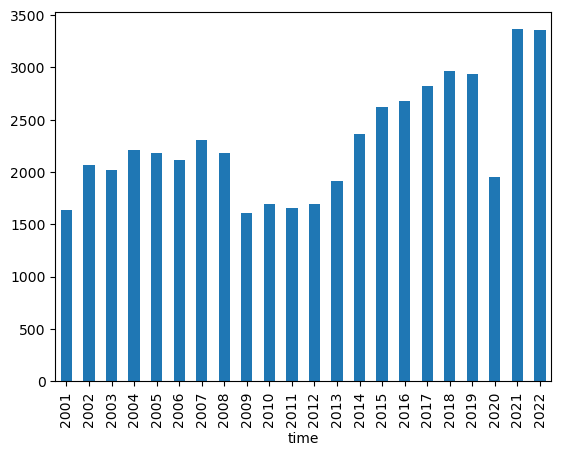

In [12]:
df.groupby(['time'])['job vacancies(in 1000s) '].sum().plot(kind='bar')

<AxesSubplot:xlabel='time'>

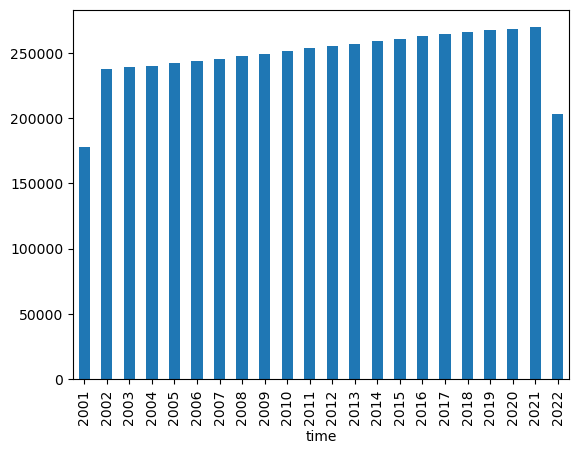

In [13]:
df.groupby(['time'])['POPULATION (in 1000s)'].sum().plot(kind='bar')

## Data according to Quarters.

In [19]:
df.columns[1:-1]

Index(['unemployment rate', 'gdp growth(%)', 'inflation (%)',
       'job vacancies(in 1000s) ', 'POPULATION (in 1000s)'],
      dtype='object')

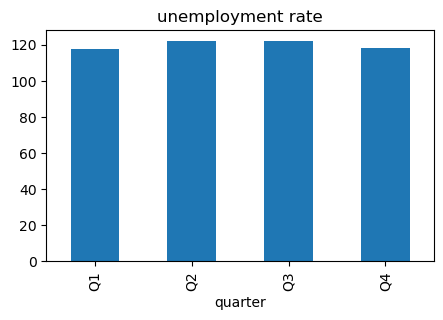

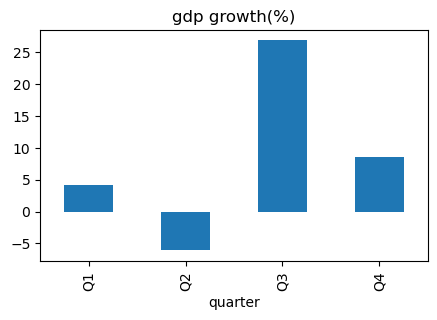

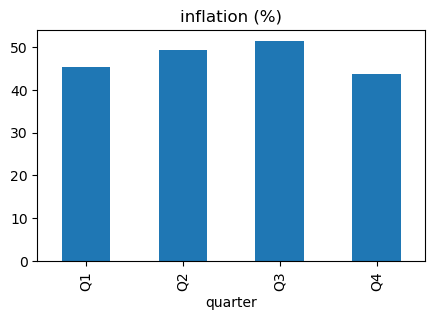

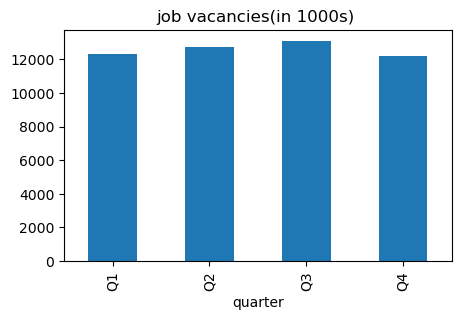

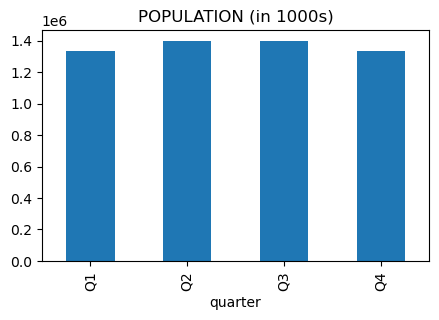

In [22]:
for col in df.columns[1:-1]:
    df.groupby(['quarter'])[col].sum().plot(kind='bar',figsize=(5,3))
    plt.title(col)
    plt.show()

In [63]:
df.columns[2:-1]

Index(['gdp growth(%)', 'inflation (%)', 'job vacancies(in 1000s) ',
       'POPULATION (in 1000s)'],
      dtype='object')

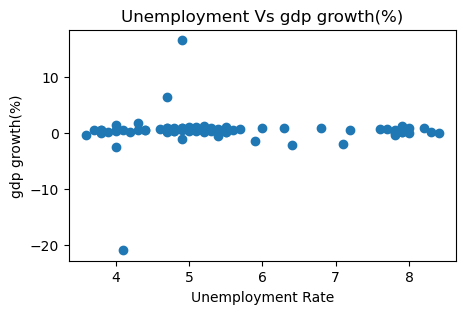

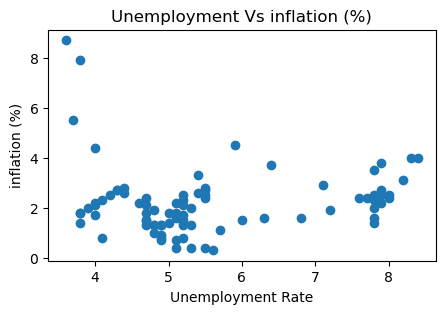

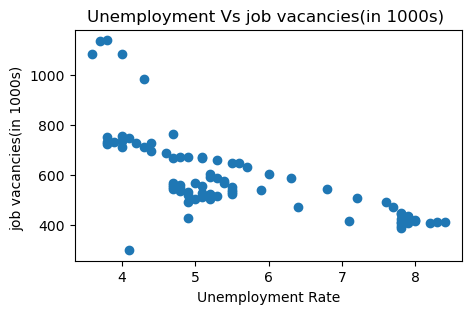

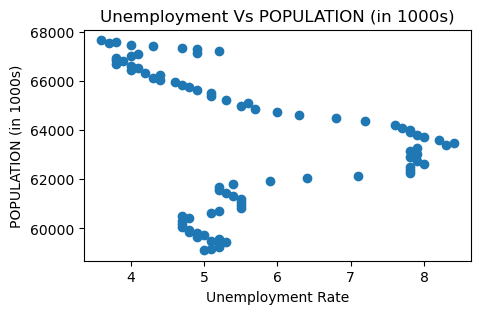

In [68]:
for i in df.columns[2:-1]:
    plt.figure(figsize=(5,3))
    plt.scatter(df['unemployment rate'], df[i])
    plt.xlabel('Unemployment Rate')
    plt.ylabel(i)
    plt.title('Unemployment Vs '+ i)
    plt.show()

We have created graphs between Unemployment and other attributes to see the relationship between them.\
* Unemployment vs GDP Growth
    * we can see that there is not any relationship between them.
* Unemployment Vs inflation
    * There is also not any proper relationship between these 2 attributes.
* Unemployment Vs Job Vaccancies
    * We can see that when the Job Vaccancies Decreases, Unemployment increases.
* Unemployment vs Population
    * from here we can see that there is also not any proper relation between these 2 attributes.
    


## Correlation Graph

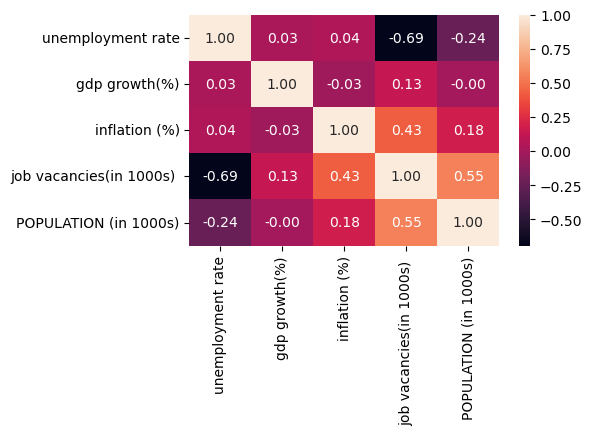

In [75]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

So from here we can see that these correlation relates with our previous analysis which we have done based on the scatter plots.\
We can see that Job Vaccancies and Unemployment have Negative Correlation.\
There is also positive correlation of 55% between Job Vaccancies and Population.\
and 1 thing which is surprised that there is a positive correlation between Job Vaccancies and inflation.

## Splitting Feature and Target Attributes

In [77]:
X = df.drop(['time','unemployment rate','quarter'], axis=1)
y = df[['unemployment rate']]

## Splitting Train Test Split

In [78]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Ordinary Least Squared (OLS)

In [81]:

model1 = sma.OLS(y_train,X_train).fit()

In [82]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      unemployment rate   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              832.0
Date:                Mon, 09 Jan 2023   Prob (F-statistic):                    2.16e-54
Time:                        15:16:42   Log-Likelihood:                         -82.370
No. Observations:                  68   AIC:                                      172.7
Df Residuals:                      64   BIC:                                      181.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
gdp growth(%)                0.0805      0.030      2.647      0.010       0.020       0.141
inflation (%)                0.4586      0.080      5.736      0.000       0.299       0.618
job vacancies(in 1000s)     -0.0088      0.001    -12.588      0.000      -0.010      -0.007
POPULATION (in 1000s)        0.0002   5.89e-06     25.960      0.000       0.000       0.000
==============================================================================
Omnibus:                       21.139   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.339
Skew:                          -1.115   Prob(JB):                     2.12e-08
Kurtosis:                       5.738   Cond. No.                     5.00e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large,  5e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the results we can see that our model worked best on the training data.\
giving 98% r_squared value. which is quite good.

### Evaluation Metrics

In [83]:
predictions_ols = model1.predict(X_test)

In [84]:
mse_ols = mean_squared_error(y_test, predictions_ols)
r2_ols = r2_score(y_test, predictions_ols)

print("Mean Squared Error:", mse_ols)
print("R Squared:", r2_ols)

Mean Squared Error: 0.43107011469513445
R Squared: 0.46487847830948825


## Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
# Make predictions on the test data
predictions_linear = model.predict(X_test)

0.6852179405967878


From here we can see that we received 68% r_squared on the training data.\
which is lower than the OLS stats model

### Evaluation Metrics

In [86]:
# Calculate the mean squared error
linear_mse = mean_squared_error(y_test, predictions_linear)
linear_ols = r2_score(y_test, predictions_linear)

print("Mean Squared Error:", linear_mse)
print("R Squared:", linear_ols)

Mean Squared Error: 0.4226982303315388
R Squared: 0.47527116234705524


## Ridge Regression

In [96]:
from sklearn.linear_model import Ridge

# Create the ridge regression object
ridge = Ridge(alpha=0.1)

# Train the model using the training set
ridge.fit(X_train, y_train)

print(ridge.score(X_train, y_train))
# Predict the values for the test set
predictions_ridge = ridge.predict(X_test)


0.6852178039466106


We can see that the results are mostly same as the Linear Regression

### Evaluation Metrics

In [88]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
ridge_mse = mean_squared_error(y_test, y_pred)
ridge_ols = r2_score(y_test, predictions_ridge)

print("Mean Squared Error:", ridge_mse)
print("R Squared:", ridge_ols)

Mean Squared Error: 0.42276155799641735
R Squared: 0.4752296599695982


## Lasso Regression

In [97]:
from sklearn.linear_model import Lasso

# Create the lasso regression object
lasso = Lasso(alpha=0.001)

# Train the model using the training set
lasso.fit(X_train, y_train)

print(lasso.score(X_train, y_train))
# Predict the values for the test set
predictions_lasso = lasso.predict(X_test)


0.6852175730882109


From the results we can see that results are mostly same as the Linear and Ridge Regression

### Evaluation Metrics

In [90]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
lasso_mse = mean_squared_error(y_test, y_pred)
lasso_ols = r2_score(y_test, predictions_lasso)

print("Mean Squared Error:", lasso_mse)
print("R Squared:", lasso_ols)

Mean Squared Error: 0.42276155799641735
R Squared: 0.47519254869410255
